In [ ]:
import torch
import numpy as np

In [ ]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

In [ ]:
x_data

tensor([[1, 2],
        [3, 4]])

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [ ]:
x_np

tensor([[1, 2],
        [3, 4]])

In [ ]:
!pip install torchgeo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.2/454.2 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 833.3/833.3 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.1/807.1 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 70.0 MB/s eta 0

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchgeo.datasets import EuroSAT100
import torch.nn.functional as F

In [2]:
traininng_data = EuroSAT100(
    root="data",
    split='val',
    download=True
)

100%|██████████| 7717354/7717354 [00:00<00:00, 28499670.93it/s]


100%|██████████| 1152/1152 [00:00<00:00, 2003249.67it/s]


100%|██████████| 383/383 [00:00<00:00, 391522.89it/s]


100%|██████████| 382/382 [00:00<00:00, 859562.30it/s]


In [3]:
test_data = EuroSAT100(
    root="data",
    split='test',
    download=True
)

In [4]:
labels_map = {
    0: 'AnnualCrop',
    1: 'Forest',
    2: 'HerbaceousVegetation',
    3: 'Highway',
    4: 'Industrial',
    5: 'Pasture',
    6: 'PermanentCrop',
    7: 'Residential',
    8: 'River',
}

In [9]:
len(traininng_data)

20

In [6]:
traininng_data[0]['image'].shape

torch.Size([13, 64, 64])

In [5]:
import matplotlib.pyplot as plt

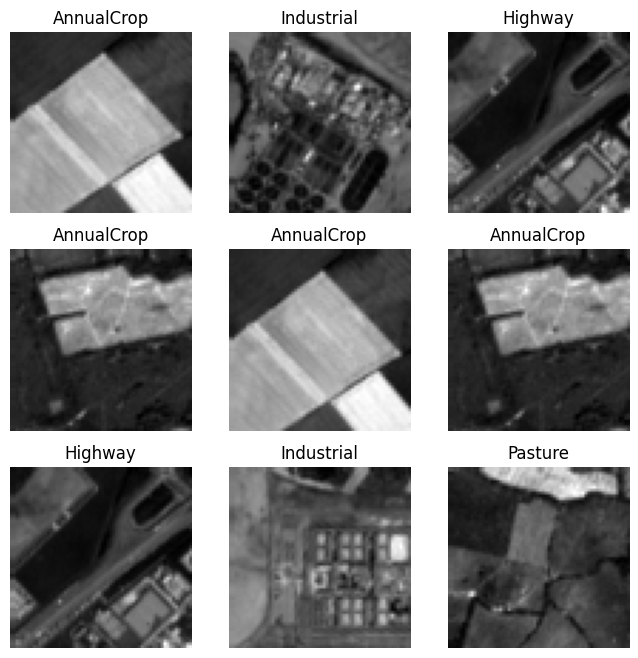

In [12]:
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(traininng_data), size=(1,)).item()
    data = traininng_data[sample_idx]
    img, label = data['image'], data['label'].item()
    figure.add_subplot(rows, cols, i)
    # Check if the label exists in the dictionary before accessing it
    if label in labels_map:
        plt.title(labels_map[label])
    else:
        # Handle the case where the label is not found (e.g., print a message or skip the title)
        print(f"Warning: Label {label} not found in labels_map")
    plt.axis('off')
    plt.imshow(img[3], cmap="gray")
plt.show()

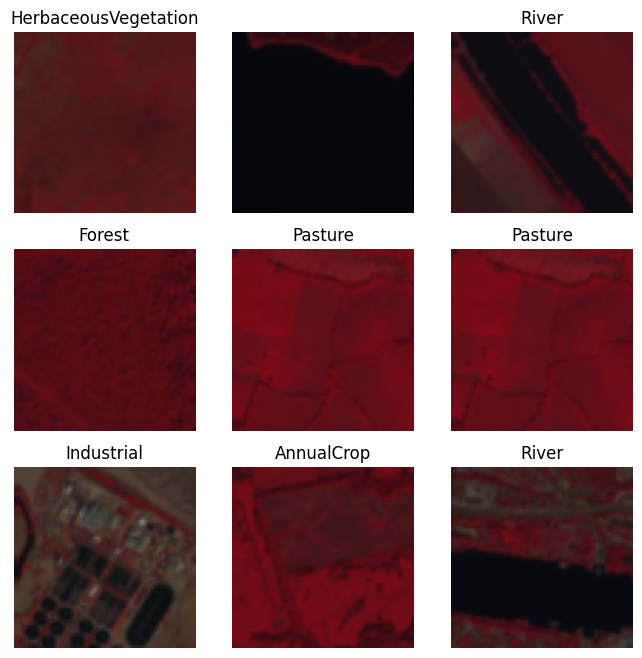

In [15]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(traininng_data), size=(1,)).item()
    data = traininng_data[sample_idx]
    img, label = data['image'], data['label'].item()
    img = torch.stack((img[7],img[3],img[2]), dim=0)
    img = torch.permute(img,(1,2,0))
    #img =T.TopILImage()(img)

    figure.add_subplot(rows, cols, i)
    # Check if the label exists in the dictionary before accessing it
    if label in labels_map:
        plt.title(labels_map[label])
    else:
        # Handle the case where the label is not found (e.g., print a message or skip the title)
        print(f"Warning: Label {label} not found in labels_map")
    plt.axis('off')
    #print(img)
    plt.imshow(img/10000)
plt.show()

In [17]:
batch_size = 4
train_dataloader = DataLoader(traininng_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

for data in train_dataloader:
    X = data['image']
    y = data['label']
    print(f"Shape of X [N, C , H ,W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C , H ,W]: torch.Size([4, 13, 64, 64])
Shape of y: torch.Size([4]) torch.int64


In [18]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [42]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(13 * 64 * 64, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# Initialize model
model = NeuralNetwork().to(device)


In [43]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
for param in model.parameters():
    print(param.shape)


torch.Size([512, 53248])
torch.Size([512])
torch.Size([128, 512])
torch.Size([128])
torch.Size([32, 128])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [44]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

In [45]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, img_data in enumerate(dataloader):
        x = img_data['image']  # Get image data
        y = img_data['label'].squeeze()  # Ensure labels are 1D

        x, y = x.to(device), y.to(device)

        # Compute prediction and loss
        pred = model(x)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()  # Reset gradients
        loss.backward()  # Backpropagate
        optimizer.step()  # Update weights

        if batch % 4 == 0:
            loss_val = loss.item()
            current = (batch + 1) * len(x)
            print(f"loss: {loss_val:>7f}  [{current:>5d}/{size:>5d}]")


In [46]:
def test_data(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for img_data in dataloader:
      X = img_data['image']
      y = img_data['label']

      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    # The following two lines were not indented properly
    test_loss /= num_batches
    correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [47]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

In [49]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test_data(test_dataloader, model, loss_fn)  # Call test_data instead of test
print("Done!")

Epoch 1
-------------------------------
loss: 10228552955685733662720.000000  [    4/   20]
loss:     nan  [   20/   20]
Test Error: 
 Accuracy: 10.0%, Avg loss:      nan 

Epoch 2
-------------------------------
loss:     nan  [    4/   20]
loss:     nan  [   20/   20]
Test Error: 
 Accuracy: 10.0%, Avg loss:      nan 

Epoch 3
-------------------------------
loss:     nan  [    4/   20]
loss:     nan  [   20/   20]
Test Error: 
 Accuracy: 10.0%, Avg loss:      nan 

Epoch 4
-------------------------------
loss:     nan  [    4/   20]
loss:     nan  [   20/   20]
Test Error: 
 Accuracy: 10.0%, Avg loss:      nan 

Epoch 5
-------------------------------
loss:     nan  [    4/   20]
loss:     nan  [   20/   20]
Test Error: 
 Accuracy: 10.0%, Avg loss:      nan 

Epoch 6
-------------------------------
loss:     nan  [    4/   20]
loss:     nan  [   20/   20]
Test Error: 
 Accuracy: 10.0%, Avg loss:      nan 

Epoch 7
-------------------------------
loss:     nan  [    4/   20]
loss:   

In [53]:
sample_idx = torch.randint(len(test_dataloader.dataset), size=(1,)).item() # Use test_dataloader.dataset to get the length of the dataset
model.eval()
x = test_dataloader.dataset[sample_idx]['image'] # Access data from test_dataloader.dataset
y = test_dataloader.dataset[sample_idx]['label']
with torch.no_grad():
    x = x.unsqueeze(0)
    x = x.to(device)
    pred = model(x)
    predicted, actual = labels_map[pred[0].argmax(0).item()], labels_map[y.item()]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "AnnualCrop", Actual: "HerbaceousVegetation"


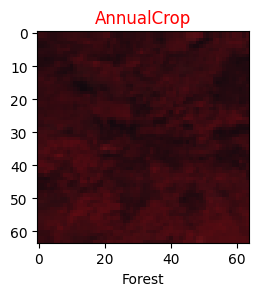

In [58]:
sample_idx = torch.randint(len(test_dataloader.dataset), size=(1,)).item() # Add parentheses to call the function
model.eval()
x = test_dataloader.dataset[sample_idx]['image']
y = test_dataloader.dataset[sample_idx]['label']
with torch.no_grad():
  x = x.unsqueeze(0)
  x = x.to(device)
  pred = model(x)
  predicted = pred[0].argmax(0).cpu().item() # Remove unpacking and assign the predicted value
  actual = y.item() # Assign the actual value
if predicted == actual: # Compare predicted and actual
  color = 'green'
else:
  color = 'red'
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.grid(False)
plt.axis()
test_img = torch.stack((x[0][7],x[0][3],x[0][2]), dim=0)
test_img = torch.permute(test_img,(1,2,0))
plt.imshow(test_img.cpu()/10000, cmap='gray')
plt.title(labels_map[predicted], color=color)
# Check if the key exists in labels_map before accessing it
if y.item() in labels_map:
  plt.xlabel(labels_map[y.item()])
else:
  plt.xlabel(f"Unknown label: {y.item()}") # Print a message if the key is not found

In [59]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.conv1 = nn.Conv2d(13, 6, 5)
    self.pool = nn.MaxPool2d(2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.con3 = nn.Conv2d(16, 120, 5)
    self.flat = nn.Flatten()
    self.fc1 = nn.Linear(120*9*9,120)
    self.fc2 = nn.Linear(120,64)
    self.fc3 = nn.Linear(64,10)
def forward(self, x):
  x = self.pool(nn.functional.relu(self.conv1(x)))
  x = self.pool(nn.functional.relu(self.conv2(x)))
  x = nn.functional.relu(self.con3(x))
  x = self.flat(x)
  x = nn.functional.relu(self.fc1(x))
  x = nn.functional.relu(self.fc2(x))
  x = self.fc3(x)
  return x

def num_flat_features(self, x):
  size = x.size()[1:]
  num_features = 1
  for s in size:
    num_features *= s
  return num_features

net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(13, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (con3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=9720, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [60]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [61]:
epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test_data(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss:     nan  [    4/   20]
loss:     nan  [   20/   20]
Test Error: 
 Accuracy: 10.0%, Avg loss:      nan 

Epoch 2
-------------------------------
loss:     nan  [    4/   20]
loss:     nan  [   20/   20]
Test Error: 
 Accuracy: 10.0%, Avg loss:      nan 

Epoch 3
-------------------------------
loss:     nan  [    4/   20]
loss:     nan  [   20/   20]
Test Error: 
 Accuracy: 10.0%, Avg loss:      nan 

Epoch 4
-------------------------------
loss:     nan  [    4/   20]
loss:     nan  [   20/   20]
Test Error: 
 Accuracy: 10.0%, Avg loss:      nan 

Epoch 5
-------------------------------
loss:     nan  [    4/   20]
loss:     nan  [   20/   20]
Test Error: 
 Accuracy: 10.0%, Avg loss:      nan 

Epoch 6
-------------------------------
loss:     nan  [    4/   20]
loss:     nan  [   20/   20]
Test Error: 
 Accuracy: 10.0%, Avg loss:      nan 

Epoch 7
-------------------------------
loss:     nan  [    4/   20]
loss:     nan  [   20/   20]
Te

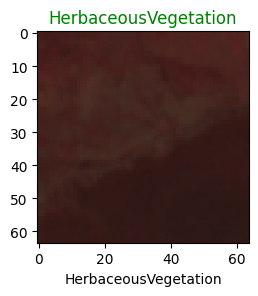

In [67]:
sample_idx = torch.randint(len(test_dataloader.dataset), size=(1,)).item()
net.eval()
x = test_dataloader.dataset[sample_idx]['image']
y = test_dataloader.dataset[sample_idx]['label']
with torch.no_grad():
  x = x.unsqueeze(0)
  x = x.to(device)
  pred = net(x)
  predicted = pred[0].argmax(0).cpu().item()
  actual = y.item()
  if predicted == actual:
    color = 'green'
  else:
    color = 'red'
  plt.figure(figsize=(6,6))
  plt.subplot(1,2,1)
  plt.grid(False)
  plt.axis()
  test_img = torch.stack((x[0][7],x[0][3],x[0][2]), dim=0)
  test_img = torch.permute(test_img,(1,2,0))
  plt.imshow(test_img.cpu()/10000, cmap='gray')
  plt.title(labels_map[predicted], color=color)
  plt.xlabel(labels_map[y.item()])